MODEL no.5:
Regression Model: Predict Wine quality from its chemical properties

Initialize Notebook

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-09-12 01:09:22.623185


1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(tf.__version__)

2.20.0


2. Load datasets

In [3]:
file_path = '/Users/daniel/Desktop/AI_ML_Activities/Prelim Activity/datasets/winequality-white.csv'
df = pd.read_csv(file_path, sep=';')
print(df.head())
print(f"Dataset shape: {df.shape}")

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

3. Preprocessing

In [4]:
X = df.drop(columns=['quality']).values
y = df['quality'].values

3.1 Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

4. Building the model

In [7]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_s.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

5. Compiling the model

In [8]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='mse',
              metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae')])

6. Training the model

In [9]:
history = model.fit(X_train_s, y_train,
                    validation_data=(X_test_s, y_test),
                    epochs=300, batch_size=32, verbose=0)

7. Evaluation

In [10]:
y_pred = model.predict(X_test_s).flatten()
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
MAE: 0.587, RMSE: 0.755, R²: 0.265


8. Visualization

8.1 Loss curve

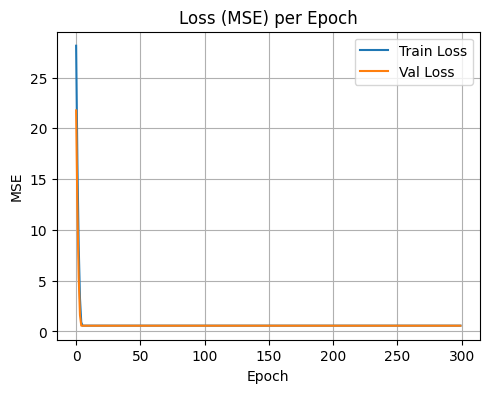

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss (MSE) per Epoch")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.grid(True)

8.2 mae curve

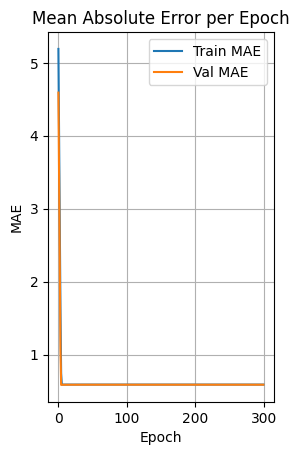

In [12]:
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("Mean Absolute Error per Epoch")
plt.xlabel("Epoch"); plt.ylabel("MAE")
plt.legend(); plt.grid(True)
plt.show()

8.3 Actual vs Predicted

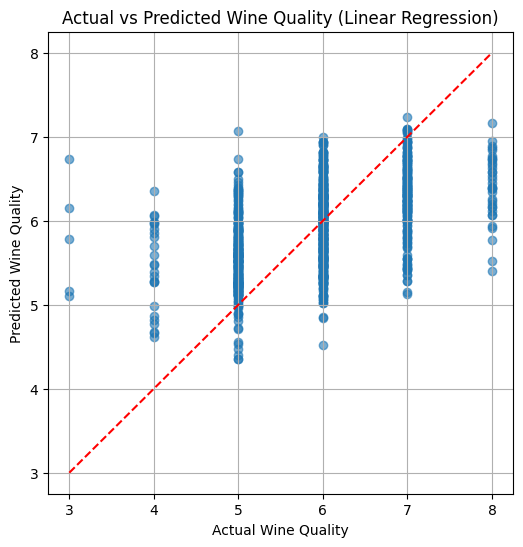

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
mx = max(y_test.max(), y_pred.max())
plt.plot([3,mx],[3,mx],'r--')
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs Predicted Wine Quality (Linear Regression)")
plt.grid(True)
plt.show()